### Análise sobre as Empresas Ativas e Inativas da cidade do Recife
As bases utilizadas foram as "Empresa Ativas da Cidade do Recife.csv" e "Empresa Inativas da Cidade do Recife.csv", disponíveis no [portal de Dados Abertos da Prefeitura de Recife](http://dados.recife.pe.gov.br/dataset/empresas-da-cidade-do-recife).

Data das bases: 19/09/2023.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
emp_ativas = pd.read_csv("Empresa Ativas da Cidade do Recife.csv")
# print(len(emp_ativas))
# emp_ativas.head()
emp_ativas.info()
# emp_ativas['situacao_empresa'].value_counts().sort_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26750 entries, 0 to 26749
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      26750 non-null  int64  
 1   cnpj                     26750 non-null  object 
 2   razao_social             26750 non-null  object 
 3   nome_fantasia            21604 non-null  object 
 4   cod_logradouro           26750 non-null  int64  
 5   nome_logradouro          26750 non-null  object 
 6   numero_residencia        8966 non-null   object 
 7   numero_lote              26750 non-null  object 
 8   cod_bairro               26750 non-null  int64  
 9   nome_bairro              26750 non-null  object 
 10  situacao_empresa         26750 non-null  object 
 11  data_abertura_empresa    26750 non-null  object 
 12  data_encerramento        1 non-null      object 
 13  cod_grupo                26750 non-null  int64  
 14  nome_grupo            

In [ ]:
emp_inativas = pd.read_csv("Empresa Inativas da Cidade do Recife.csv")
# print(len(emp_inativas))
# emp_inativas.head()
emp_inativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7750 entries, 0 to 7749
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      7750 non-null   int64  
 1   cnpj                     7750 non-null   object 
 2   razao_social             7750 non-null   object 
 3   nome_fantasia            5139 non-null   object 
 4   cod_logradouro           7750 non-null   int64  
 5   nome_logradouro          7750 non-null   object 
 6   numero_residencia        1864 non-null   object 
 7   numero_lote              7750 non-null   object 
 8   cod_bairro               7750 non-null   int64  
 9   nome_bairro              7750 non-null   object 
 10  situacao_empresa         7750 non-null   object 
 11  data_abertura_empresa    7750 non-null   object 
 12  data_encerramento        1647 non-null   object 
 13  cod_grupo                7750 non-null   int64  
 14  nome_grupo              

In [ ]:
# Juntando os dois datasets

df = pd.concat([emp_ativas, emp_inativas])
# df.head()
df['situacao_empresa'].value_counts().sort_index()

ATIVO       26750
BAIXADO      1647
INAPTO       3228
SUSPENSO     2875
Name: situacao_empresa, dtype: int64

In [ ]:
# Descobrindo a quantidade de dados nulos por coluna
df.isnull().sum()

_id                            0
cnpj                           0
razao_social                   0
nome_fantasia               7757
cod_logradouro                 0
nome_logradouro                0
numero_residencia          23670
numero_lote                    0
cod_bairro                     0
nome_bairro                    0
situacao_empresa               0
data_abertura_empresa          0
data_encerramento          32852
cod_grupo                      0
nome_grupo                     0
cnae                           0
desc_atividade                 0
atividade_principal            0
atividade_vig_sanitaria        0
atividade_predominante         0
incomodo                       0
latitude                   14882
longitude                  14882
dtype: int64

<Axes: >

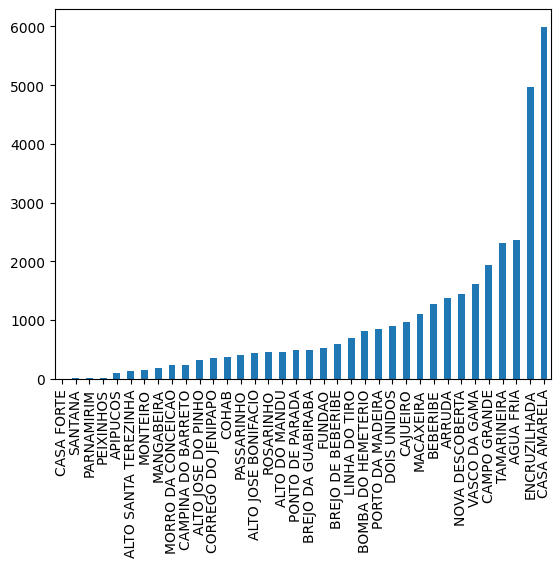

In [ ]:
# Quantidade de empresas por bairros
qtd_emp_bairros = df['nome_bairro'].value_counts().sort_values()
# qtd_emp_bairros
qtd_emp_bairros.plot(kind='bar')

In [ ]:
# Como a grande maioria dos registros possui, ao menos, um campo vazio, ao darmos um
# dropna reduz-se nossa base de dados para apenas 91 registros.
df2 = pd.DataFrame(df.dropna())
len(df2)

# Ou seja, apenas 91 das empresas cadastradas possuem o cadastro completo.
# Isso também indica que essas são, com certeza, empresas fechadas, pois possuem a data de encerramento preenchido.

91

<Axes: xlabel='nome_bairro'>

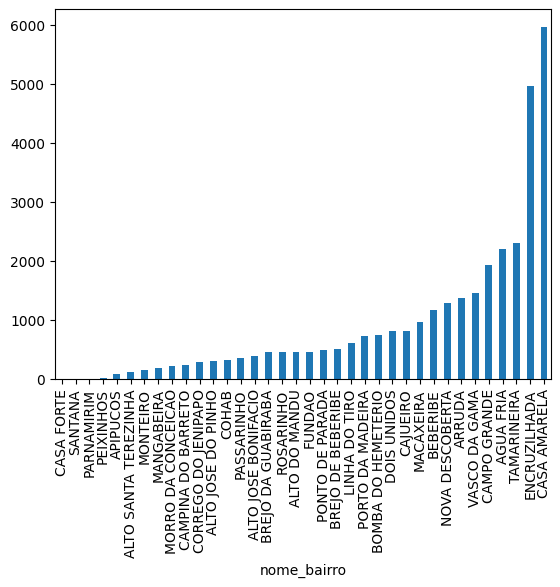

In [ ]:
# Empresas que não fecharam as portas/não possuem data de encerramento

df3 = df.where(df['data_encerramento'].isnull()).groupby(by=['nome_bairro']).size().sort_values()
df3.plot(kind='bar')
# df3